# Homework

1. Recreate it to make a 10 second video with this parameters:

a. from t= 0.000 Myr to t = 450.0 Myr
b. N_steps = 10,000
c. fps = 100 (fixed based on the anim_two_disks_3d() function)
d. N_snapshots = 1000

Note: Based on the textbook, the number of steps to get a simulation from t= 0.000 to t=450.0 
with N_steps = 10,000 is to calculate the delta_t (time step):

$$ \delta_t = 450 / 10000$$
$$ \delta_t = 0.045$$

In [1]:
from galcol import parameters, init_disk, evolve_two_disks, plot_energy, show_orbits_3d
galaxies = {
    'intruder' : parameters(
        # mass in solar masses
        1e10, 
        # disk radius in kpc
        5, 
        # Cartesian coordinates (x,y,z) of initial position in kpc 
        (25,-25,-5), 
        # x-, y-, z-components of initial velocity in km/s
        (-75,75,0),
        # normal to galactic plane (disk is in xy-plane)
        (0,0,1), 
        # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
        5, 
        # total number of stars
        1000, 
        # softening factor defines inner edge of disk (in units of disk radius)
        0.025),
    'target' : parameters(5e10, 10, (-5,5,1), (15,-15,0), (1,-1,2**0.5), 10, 4000, 0.025),
}

init_disk(galaxies['intruder'])
init_disk(galaxies['target'])

Plane normal: phi = -45.0°, theta = 45.0°


In [2]:
galaxies['intruder']

{'mass': <Quantity 1.e+10 solMass>,
 'radius': <Quantity 5. kpc>,
 'center_pos': <Quantity [ 25., -25.,  -5.] kpc>,
 'center_vel': <Quantity [-75.,  75.,   0.] km / s>,
 'normal': (0, 0, 1),
 'N_rings': 5,
 'N_stars': 1000,
 'softening': 0.025,
 'stars_pos': <Quantity [[ 25.30590917,  24.35272377,  25.10451461, ...,  25.67704511,
              24.8573788 ,  27.25580923],
            [-24.75111781, -25.54559281, -24.36529679, ..., -20.13914633,
             -29.64067717, -28.33719813],
            [ -5.        ,  -5.        ,  -5.        , ...,  -5.        ,
              -5.        ,  -5.        ]] kpc>,
 'stars_vel': <Quantity [[-272.19750149,   67.90512134, -329.20598099, ...,
             -167.7056915 ,   21.19840932,   10.68347076],
            [ 339.7756651 ,  -99.30013663,  122.24538426, ...,
               88.00472392,   71.94147507,  132.75490905],
            [   0.        ,    0.        ,    0.        , ...,
                0.        ,    0.        ,    0.        ]] km / s>,


In [3]:
galaxies['target']

{'mass': <Quantity 5.e+10 solMass>,
 'radius': <Quantity 10. kpc>,
 'center_pos': <Quantity [-5.,  5.,  1.] kpc>,
 'center_vel': <Quantity [ 15., -15.,   0.] km / s>,
 'normal': (1, -1, 1.4142135623730951),
 'N_rings': 10,
 'N_stars': 4000,
 'softening': 0.025,
 'stars_pos': <Quantity [[ -4.77196806,  -5.4260735 ,  -4.99105822, ..., -12.83923272,
              -4.71029374,   2.74671185],
            [  5.17860365,   5.14397823,   5.42992894, ...,   5.77484804,
              -2.7677926 ,   5.24218711],
            [  0.96504893,   1.40308745,   1.29768288, ...,   7.09107492,
              -4.69751208,  -4.30650033]] kpc>,
 'stars_vel': <Quantity [[-200.18684455, -305.46243419, -538.07167853, ...,
              -38.11943482,  144.28875186,   55.08416588],
            [ 581.50089308, -503.77923811, -156.27314012, ...,
             -141.74399444,   32.23305783,  115.98183049],
            [ 573.94990349, -119.01795343,  291.18553899, ...,
              -52.06042536,  -58.02213769,   64.274

In [4]:
import astropy.units as unit

times, snapshots, velocity_snapshots = evolve_two_disks(galaxies['target'], galaxies['intruder'], N_steps = 10_000, N_snapshots= 1_000, time_step=0.045*unit.Myr)

Solving equations of motion for two galaxies (Leapfrog integration)
100 % (stopped at t = 450.0 Myr)


In [ ]:

from galcol import anim_two_disks_3d

# anim_two_disks_3d(snapshots, galaxies['target']['N_stars'], name = 'two_disks_3d_anim' )


4.12 The effect of the collision of two galaxies depends mainly on their relative velocity and the impact parameter $b$, which is defined as the perpendicular distance
between the path of the intruder galaxy from infinity and the center of the target galaxy. If the separation of the two galaxies at time $t = 0$ is large enough, it can be
assumed that the intruder is nearly unaffected by the gravity of the target and moves along a straight line through its center in the direction of its initial velocity vector.
The impact parameter is then given by the normal distance of this line to the center of the target.

1. Calculate b in kpc for the scenario discussed in this section. Vary the impact parameter by changing the initial position of the intruder. Compute the resulting
evolution of the two disks and interpret the results.

In [ ]:
import numpy as np
from astropy import units as u

def calculate_b(intruder_position, intruder_velocity, target_position):
    # Convert the input tuples to Quantity objects with appropriate units
    intruder_position = np.array(intruder_position) * u.kpc
    intruder_velocity = np.array(intruder_velocity) * u.km / u.s
    target_position = np.array(target_position) * u.kpc

    # Calculate the relative position vector
    relative_position = intruder_position - target_position

    # Calculate the cross product of the relative position and the velocity
    cross_product = np.cross(relative_position, intruder_velocity)

    # Calculate the norm of the velocity
    velocity_norm = np.linalg.norm(intruder_velocity)

    # Calculate b using the formula: || (r0 - rt) x v || / ||v||
    b = np.linalg.norm(cross_product) / velocity_norm

    return b.to(u.kpc)

intruder_position = galaxies['intruder']['center_pos']
intruder_velocity = galaxies['intruder']['center_vel']
target_position = galaxies['target']['center_pos']

b = calculate_b(intruder_position, intruder_velocity, target_position)
print(f"The impact parameter b is {b}")


In [ ]:
# Number of scenarios to consider
num_scenarios = 10

# Initialize the arrays
intruder_position_arr = np.empty((num_scenarios, 3)) * u.kpc
intruder_velocity_arr = np.empty((num_scenarios, 3)) * u.km / u.s
target_position_arr = np.empty((num_scenarios, 3)) * u.kpc

# Set the initial positions and velocities
intruder_position_arr[0] = np.array(intruder_position) * u.kpc
intruder_velocity_arr[0] = np.array(intruder_velocity) * u.km / u.s
target_position_arr[0] = np.array(target_position) * u.kpc

# Populate the arrays
for i in range(1, num_scenarios):
    # Move the intruder 5 kpc further in the x-direction
    intruder_position_arr[i] = intruder_position_arr[i-1] + np.array([5, 0, 0]) * u.kpc
    # Keep the velocities the same
    intruder_velocity_arr[i] = intruder_velocity_arr[0]
    # Keep the target position the same
    target_position_arr[i] = target_position_arr[0]

# Calculate the impact parameters
b_values = np.empty(num_scenarios) * u.kpc

for i in range(num_scenarios):
    b_values[i] = calculate_b(intruder_position_arr[i], intruder_velocity_arr[i], target_position_arr[i])

# # Print the results
# for i in range(num_scenarios):
#     print(f"For scenario {i+1}, the impact parameter b is {b_values[i]}")

In [ ]:
import matplotlib.pyplot as plt

# Generate an array of distances added for the x-axis
distances_added = np.arange(0, num_scenarios * 5, 5)

# Convert b_values to kpc for plotting
b_values_kpc = b_values.to(u.kpc).value

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(distances_added, b_values_kpc, marker='o')

# Add labels and title
plt.xlabel('Distance Added (kpc)')
plt.ylabel('Impact Parameter (kpc)')
plt.title('Impact Parameter vs Distance Added to Intruder Position')

# Display the plot
plt.grid(True)
plt.show()


In [7]:
def produce_simulations(intruder_position_arr, num_scenarios):
    for i in range(num_scenarios):
        galaxies = {
        'intruder' : parameters(
            # mass in solar masses
            1e10, 
            # disk radius in kpc
            5, 
            # Cartesian coordinates (x,y,z) of initial position in kpc 
            # (25,-25,-5), 
            intruder_position_arr[i].value,
            # x-, y-, z-components of initial velocity in km/s
            (-75,75,0),
            # normal to galactic plane (disk is in xy-plane)
            (0,0,1), 
            # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
            5, 
            # total number of stars
            1000, 
            # softening factor defines inner edge of disk (in units of disk radius)
            0.025),
        'target' : parameters(5e10, 10, (-5,5,1), (15,-15,0), (1,-1,2**0.5), 10, 4000, 0.025),
        } 
        init_disk(galaxies['intruder'])
        init_disk(galaxies['target'])

        times, snapshots = evolve_two_disks(galaxies['target'], galaxies['intruder'], N_steps = 10_000, N_snapshots= 1_000, time_step=0.045*unit.Myr)
        anim_two_disks_3d(snapshots, galaxies['target']['N_stars'], name = f'intruder_pos/anim_{i}')

        
        
    

In [ ]:
# produce_simulations(intruder_position_arr, num_scenarios)

# 4.13

The head-on collision of two disks can result in a Cartwheel-like galaxy. The name refers to the large outer ring which gives the galaxy the appearance of a wagon wheel. In this case, the intruder moves in z-direction toward the target and its normal is aligned with the direction of motion. The plane of the target disk is parallel to the intruder’s disk. Vary the relative velocity and the impact parameter. Can you produce a post-collision galaxy of a similar shape as the Carthwheel Galaxy?

## Notes

- A Cartwheel Galaxy is a result of a head-on collision between two galaxies: one smaller "intruder" galaxy passes through a larger "target" galaxy. The intruder galaxy can be of any type, but it's typically smaller in mass than the target galaxy. The target galaxy, which becomes the Cartwheel Galaxy, is usually a disk galaxy with a lot of gas and dust, which are needed to form the ring and spokes structure.
- Initial Condition and Position: The intruder galaxy needs to pass through the center of the target galaxy nearly head-on. This means an impact parameter close to zero, where the impact parameter is perpendicular distance from the path of the intruder to the center of target.
- Relative Velocities: The intruder galaxy should be moving fast enough to go through the target galaxy without being captured, but not so fast that the target galaxy doesn't have time to react to the collision. The exact velocity would depend on the masses of the two galaxies and the distance between them.
- Masses: The intruder galaxy should be smaller in mass than the target galaxy but still massive enough to significantly disturb the target's gravitational field.
- Disk Orientation: The disks of the two galaxies should be parallel or nearly parallel at the time of the collision. The angle θ, which is the angle between the planes of the two galaxies, should be close to 0°.

In [ ]:
cartwheel_galaxies = {
    'intruder' : parameters(
        # mass in solar masses
        1e10, 
        # disk radius in kpc
        5, 
        # Cartesian coordinates (x,y,z) of initial position in kpc 
        (0,-50,0), 
        # x-, y-, z-components of initial velocity in km/s
        (0,100,0),
        # normal to galactic plane (disk is in xy-plane)
        (0,0,1), 
        # number of rings (each ring will be randomly populated with 1000/5 = 200 stars)
        5, 
        # total number of stars
        1000, 
        # softening factor defines inner edge of disk (in units of disk radius)
        0.025),
    'target' : parameters(
        # mass in solar masses
        5e10, 
        # disk radius in kpc
        10, 
        # Cartesian coordinates (x,y,z) of initial position in kpc 
        (0,0,0), 
        # x-, y-, z-components of initial velocity in km/s
        (0,0,0),
        # normal to galactic plane (disk is in xy-plane)
        (0,0,1), 
        # number of rings (each ring will be randomly populated with 4000/10 = 400 stars)
        10, 
        # total number of stars
        4000, 
        # softening factor defines inner edge of disk (in units of disk radius)
        0.025),
}


In [ ]:
init_disk(cartwheel_galaxies['intruder'])
init_disk(cartwheel_galaxies['target'])

In [ ]:

cartwheel_times, cartwheel_snapshots, cartwheel_velocity_snapshots = evolve_two_disks(cartwheel_galaxies['target'], cartwheel_galaxies['intruder'], N_steps = 10_000, N_snapshots= 1_000, time_step=0.05*unit.Myr)



In [ ]:
# anim_two_disks_3d(cart_coords_data, cartwheel_galaxies['target']['N_stars'], name = 'cartwheel_3d_anim' )

In [ ]:
intruder_position = cartwheel_galaxies['intruder']['center_pos']
intruder_velocity = cartwheel_galaxies['intruder']['center_vel']
target_position = cartwheel_galaxies['target']['center_pos']

cart_b = calculate_b(intruder_position, intruder_velocity, target_position)
print(f"The impact parameter b is {cart_b}")


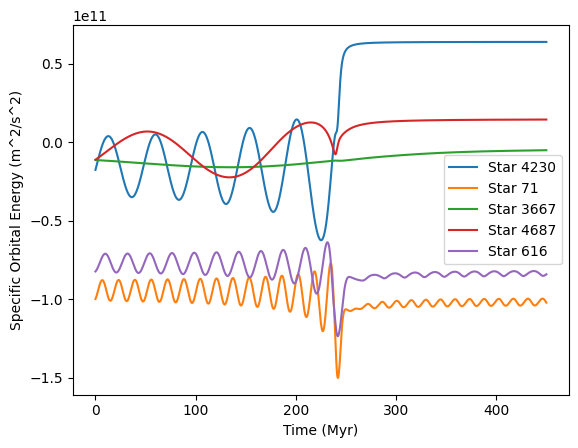

In [5]:

def get_sample_stars(primary, secondary, N_samples=5):
    import numpy as np
    # Number of stars in each galaxy
    N1, N2 = primary['N_stars'], secondary['N_stars']

    # Randomly select N_samples indices
    return np.random.choice(N1 + N2, size=N_samples, replace=False)

indices = get_sample_stars(galaxies['target'], galaxies['intruder'], N_samples=5)

plot_energy(times, snapshots, velocity_snapshots, galaxies['target'], galaxies['intruder'], indices)

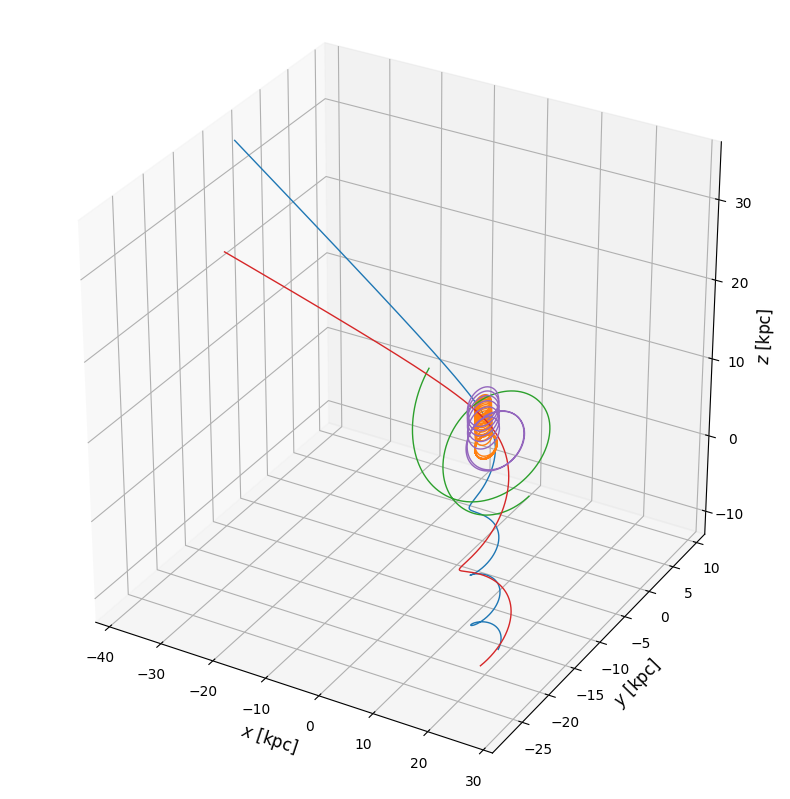

In [6]:
show_orbits_3d(indices, snapshots)